In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
a = np.random.rand(3,3)
a
b = np.random.rand(3,3)
print (a)
print (b)
print (a*b)
print (np.dot(a,b))

[[ 0.92861302  0.7095943   0.77206875]
 [ 0.63373795  0.56680544  0.91689594]
 [ 0.22930388  0.02962789  0.73542032]]
[[ 0.51881335  0.53056554  0.087265  ]
 [ 0.55990834  0.60586042  0.15406738]
 [ 0.96857925  0.67394577  0.21170094]]
[[ 0.48177683  0.37648628  0.06737458]
 [ 0.35483516  0.34340498  0.14126376]
 [ 0.22209898  0.01996759  0.15568917]]
[[ 1.62689437  1.44293764  0.35380843]
 [ 1.53423718  1.29758263  0.3367371 ]
 [ 0.84786768  0.63524452  0.18026407]]


In [3]:
a = np.array([2, 3, 4])
c = [2, 3, 4]
b = np.array(c, ndmin = 2).T
b.ndim

2

In [4]:
class NeuralNets:
    
    def __init__(self, inputlayers, hiddenlayers, outputlayers, learningrate):
        self.inode = inputlayers
        self.hnode = hiddenlayers
        self.onode = outputlayers
        # learning rate
        self.lr = learningrate
        self.whi = np.random.normal(0.0, pow(self.hnode,-0.5),(self.hnode, self.inode))
        self.who = np.random.normal(0.0, pow(self.onode, -0.5),(self.onode, self.hnode)) 
        self.sigmoid = lambda x: 1/(1 + np.exp(-x))
        pass
    
    def train(self, inputs_list, target_list):
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(target_list, ndmin = 2).T
        
        # hidden layer activation
        hidden_inputs = np.dot(self.whi, inputs)
        hidden_outputs = self.sigmoid(hidden_inputs)
        
        # final layer activation
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)
        
        # backprop
        output_error = targets - final_outputs
        hidden_error = np.dot(self.who.T, output_error)
        
        # GDA
        
        self.who = self.who + self.lr*np.dot(output_error*final_outputs*(1 - final_outputs), hidden_outputs.T)
        self.whi = self.whi + self.lr*np.dot(hidden_error*hidden_outputs*(1-hidden_outputs), inputs.T)
        
        pass
    
    def query(self, input_list):
        
        # convert to 2d array (why?)
        inputs = np.array(input_list,ndmin = 2).T
        
        # hidden layer activation
        hidden_inputs = np.dot(self.whi, inputs)
        hidden_outputs = self.sigmoid(hidden_inputs)
        
        # final layer activation
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)
        return final_outputs
    
    
 

In [5]:
inputlayers = 784
hiddenlayers = 100
outputlayers = 10
learningrate = 0.3


In [6]:
Nn = NeuralNets(inputlayers, hiddenlayers, outputlayers, learningrate)

In [7]:
data_file = open('F:\\machine learning\\urgent study\\mnist_train_100.csv', 'r')
#data_file = open('C:\\Users\\kunal\\Downloads\\mnist_train.csv', 'r')
data_line = data_file.readlines()
data_file.close()

In [8]:
for every_line in data_line:
    inputs = every_line.split(',')
    inputs_net = np.asfarray(inputs[1:])/255*0.99 + 0.01
    target = np.zeros(outputlayers) + 0.01
    target[int(inputs[0])] = 0.99
    Nn.train(inputs_net, target)
    


In [9]:
data_test_file = open('C:\\Users\\kunal\\Downloads\\mnist_test.csv','r')
data_test_line = data_test_file.readlines()
data_test_file.close()

score = []
for test in data_test_line:
    test_data = test.split(',')
    correct_ans = float(test_data[0])
    test_data = np.asfarray(test_data[1:])/255*0.99 + 0.01
    Neural = Nn.query(test_data)
    Neural = float(Neural.argmax())
#    print('The correct ans is: ', correct_ans)
#    print('The answer predicted is: ', Neural)
#    print()
    if correct_ans == Neural:
        score.append(1)
    else:
        score.append(0)
percentage_score = (sum(score)/len(score))*100

print(percentage_score)
    

57.07


In [10]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [11]:
class NeuralNets2:
    
    def __init__(self, inputlayers, hiddenlayer1, hiddenlayer2, outputlayers, learningrate):
        self.inode = inputlayers
        self.hnode1 = hiddenlayer1
        self.hnode2 = hiddenlayer2
        self.onode = outputlayers
        # learning rate
        self.lr = learningrate
        self.whi_1 = np.random.normal(0.0, pow(self.hnode1,-0.5),(self.hnode1, self.inode))
        self.whi_2 = np.random.normal(0.0, pow(self.hnode2,-0.5),(self.hnode2, self.hnode1))
        self.who = np.random.normal(0.0, pow(self.onode, -0.5),(self.onode, self.hnode2)) 
        self.sigmoid = lambda x: 1/(1 + np.exp(-x))
        pass
    
    def train(self, inputs_list, target_list):
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(target_list, ndmin = 2).T
        
        # first hidden layer activation
        hidden_inputs_1 = np.dot(self.whi_1, inputs)
        hidden_outputs_1 = self.sigmoid(hidden_inputs_1)
        
        # second hidden layer activation
        hidden_inputs_2 = np.dot(self.whi_2, hidden_outputs_1)
        hidden_outputs_2 = self.sigmoid(hidden_inputs_2)
        
        # final layer activation
        final_inputs = np.dot(self.who, hidden_outputs_2)
        final_outputs = self.sigmoid(final_inputs)
        
        # backprop
        output_error = targets - final_outputs
        hidden_error_2 = np.dot(self.who.T, output_error)
        hidden_error_1 = np.dot(self.whi_2.T, hidden_error_2)
        
        # GDA
        
        self.who = self.who + self.lr*np.dot(output_error*final_outputs*(1 - final_outputs), hidden_outputs_2.T)
        self.whi_2 = self.whi_2 + self.lr*np.dot(hidden_error_2*hidden_outputs_2*(1-hidden_outputs_2), hidden_outputs_1.T)
        self.whi_1 = self.whi_1 + self.lr*np.dot(hidden_error_1*hidden_outputs_1*(1-hidden_outputs_1), inputs.T)
        
        pass
    
    def query(self, input_list):
        
        # convert to 2d array (why?)
        inputs = np.array(input_list, ndmin = 2).T
        
         # first hidden layer activation
        hidden_inputs_1 = np.dot(self.whi_1, inputs)
        hidden_outputs_1 = self.sigmoid(hidden_inputs_1)
        
        # second hidden layer activation
        hidden_inputs_2 = np.dot(self.whi_2, hidden_outputs_1)
        hidden_outputs_2 = self.sigmoid(hidden_inputs_2)
        
        # final layer activation
        final_inputs = np.dot(self.who, hidden_outputs_2)
        final_outputs = self.sigmoid(final_inputs)
        return final_outputs


In [12]:
inputlayers = 784
hiddenlayer1 = 100
hiddenlayer2 = 50
outputlayers = 10
learningrate = 0.3

In [13]:
Nn2 = NeuralNets2(inputlayers, hiddenlayer1, hiddenlayer2, outputlayers, learningrate)

In [14]:
data_file = open('C:\\Users\\kunal\\Downloads\\mnist_train.csv', 'r')
data_line = data_file.readlines()
data_file.close()

In [15]:
for every_line in data_line:
    inputs = every_line.split(',')
    inputs_net = np.asfarray(inputs[1:])/255*0.99 + 0.01
    target = np.zeros(outputlayers) + 0.01
    target[int(inputs[0])] = 0.99
    Nn2.train(inputs_net, target)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in exp


In [16]:
data_test_file = open('C:\\Users\\kunal\\Downloads\\mnist_test.csv','r')
data_test_line = data_test_file.readlines()
data_test_file.close()

score = []
for test in data_test_line:
    test_data = test.split(',')
    correct_ans = float(test_data[0])
    test_data = np.asfarray(test_data[1:])/255*0.99 + 0.01
    Neural = Nn2.query(test_data)
    Neural = float(Neural.argmax())
#    print('The correct ans is: ', correct_ans)
#    print('The answer predicted is: ', Neural)
#    print()
    if correct_ans == Neural:
        score.append(1)
    else:
        score.append(0)
percentage_score = (sum(score)/len(score))*100

print(percentage_score)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in exp


78.51


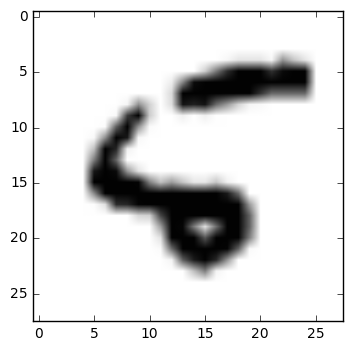

In [17]:
data_test_file = open('F:\\machine learning\\urgent study\\mnist_test_10.csv','r')
data_test_line = data_test_file.readlines()
data_test_file.close()

test_data = data_test_line[8].split(',')
test_image_data = np.asfarray(test_data[1:]).reshape(28,28)
plt.imshow(test_image_data, cmap = 'Greys', interpolation = None)

In [18]:
test_data_query = np.asfarray(test_data[1:])/255*0.99 + 0.01
Nn.query(test_data_query)

array([[ 0.02636976],
       [ 0.18744359],
       [ 0.01588689],
       [ 0.00209756],
       [ 0.16241185],
       [ 0.16559036],
       [ 0.03617705],
       [ 0.04723346],
       [ 0.03484713],
       [ 0.00072734]])

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

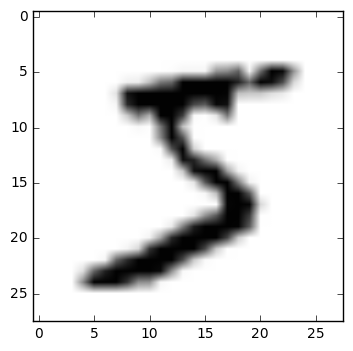

In [20]:
all_data = data_line[0].split(',')
image_data = np.asfarray(all_data[1:]).reshape(28,28)
plt.imshow(image_data, cmap = 'Greys', interpolation = None)

In [21]:
all_data_scaled = (np.asfarray(all_data[1:])/255)*0.99 + 0.01
#print( all_data_scaled)

In [22]:
onodes = 10
target = np.zeros(onodes) + 0.01
target[int(all_data[0])] = 0.99
target

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.99,  0.01,  0.01,  0.01,  0.01])

In [23]:
a = np.random.rand(1,5)

In [24]:
a

array([[ 0.45009466,  0.82656995,  0.44262352,  0.26549617,  0.7587111 ]])

In [25]:
a.argmax()

1

In [26]:
a = str(23)
a

'23'

In [27]:
a = float(a)
a

23.0

In [28]:
a = [2,43,6]
sum(a)

51

In [35]:
a = np.array([2,3,4], ndmin = 2)
a.shape
b = np.random.normal(3, 2, 2)
b.shape

(2,)